  Welcome to this Cricket Visual Analytic System ... !

! Analyzing Indian Cricketers' Stats with Visual Analytics !

!!!  Press 1 for Test Matches...
!!!  Press 2 for ODI Matches...
!!!  Press 3 for T20 Matches...
!!!  Type 'quit' to Exit...


Give Your Choice ! :  1
Type 'Batsmen' or 'Bowler' for their stats (or 'back' to return):  bowler


C:\Users\Yug dandawala\AppData\Local\Temp\ipykernel_18120\1048968282.py:247: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Innings'], y=df['Wickets'], palette='coolwarm',linestyle='--')


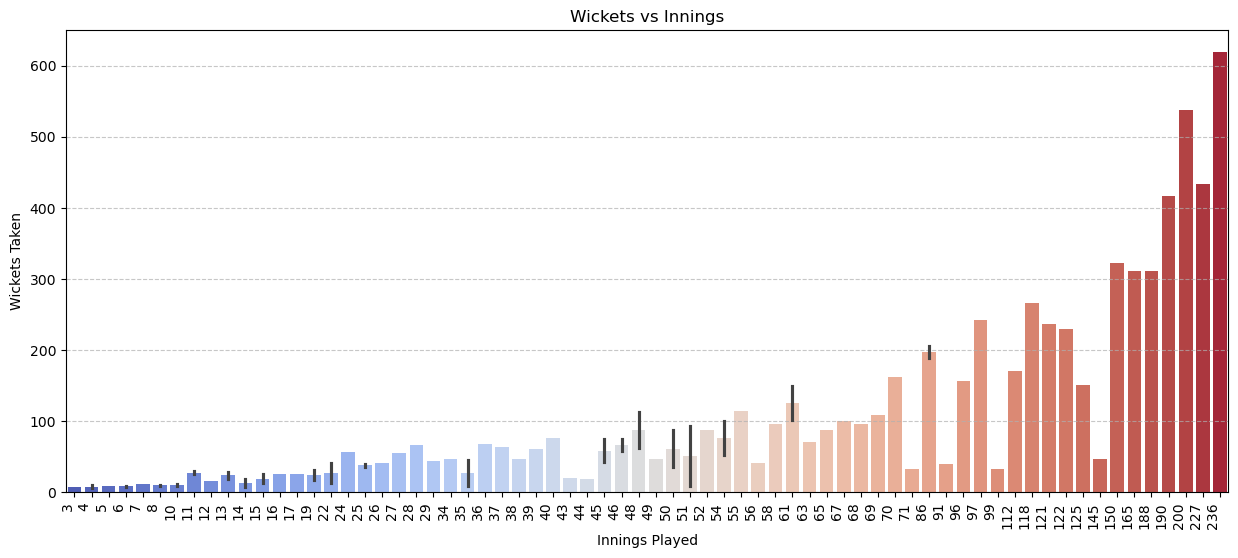

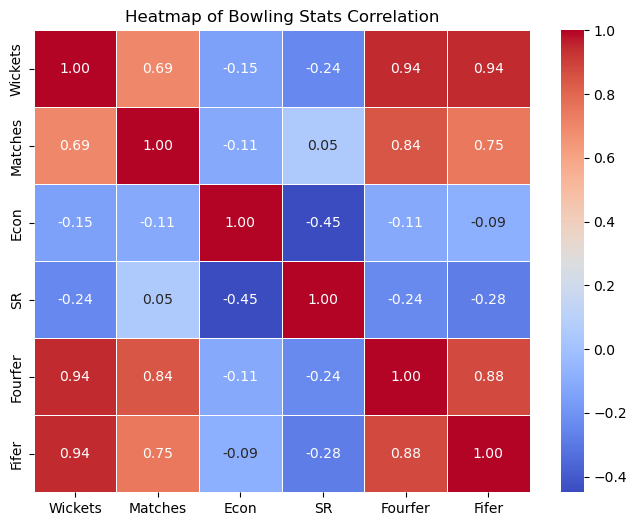

C:\Users\Yug dandawala\AppData\Local\Temp\ipykernel_18120\1048968282.py:230: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df['Matches'], x=df['Wickets'], palette='viridis')


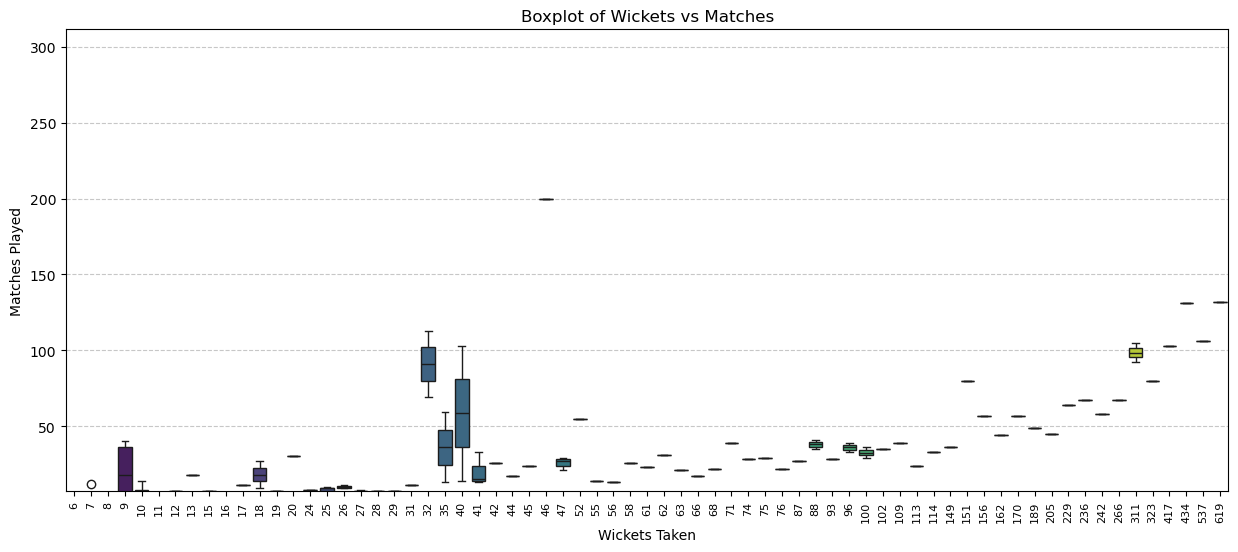

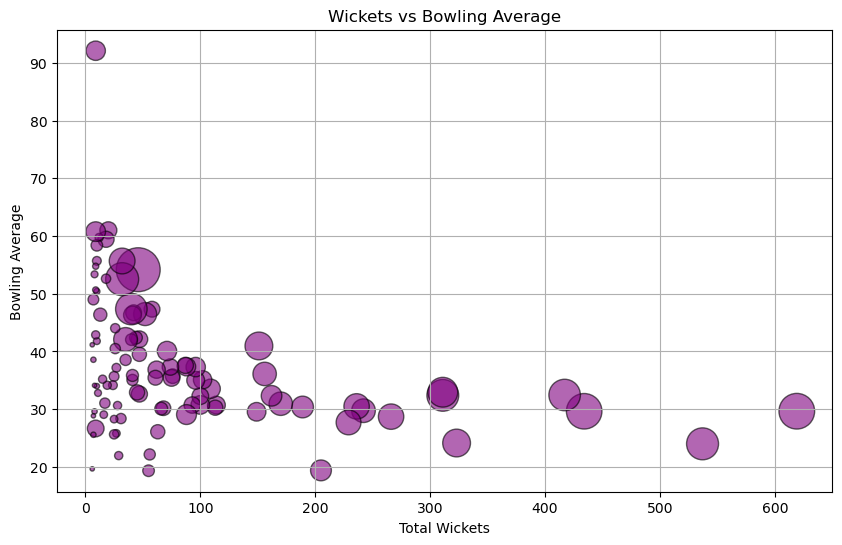

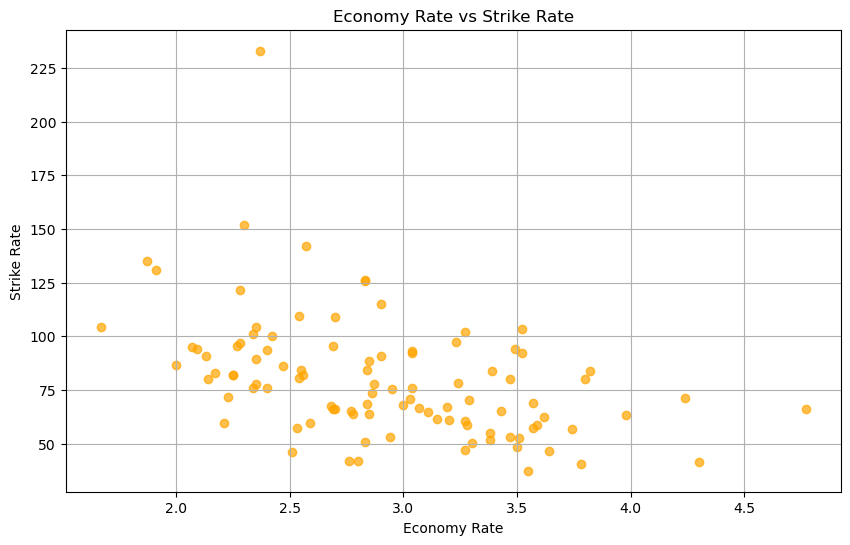

C:\Users\Yug dandawala\AppData\Local\Temp\ipykernel_18120\1048968282.py:180: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Player', y='BBI_Wickets', data=df_shuffled, palette='magma')  # Use shuffled data


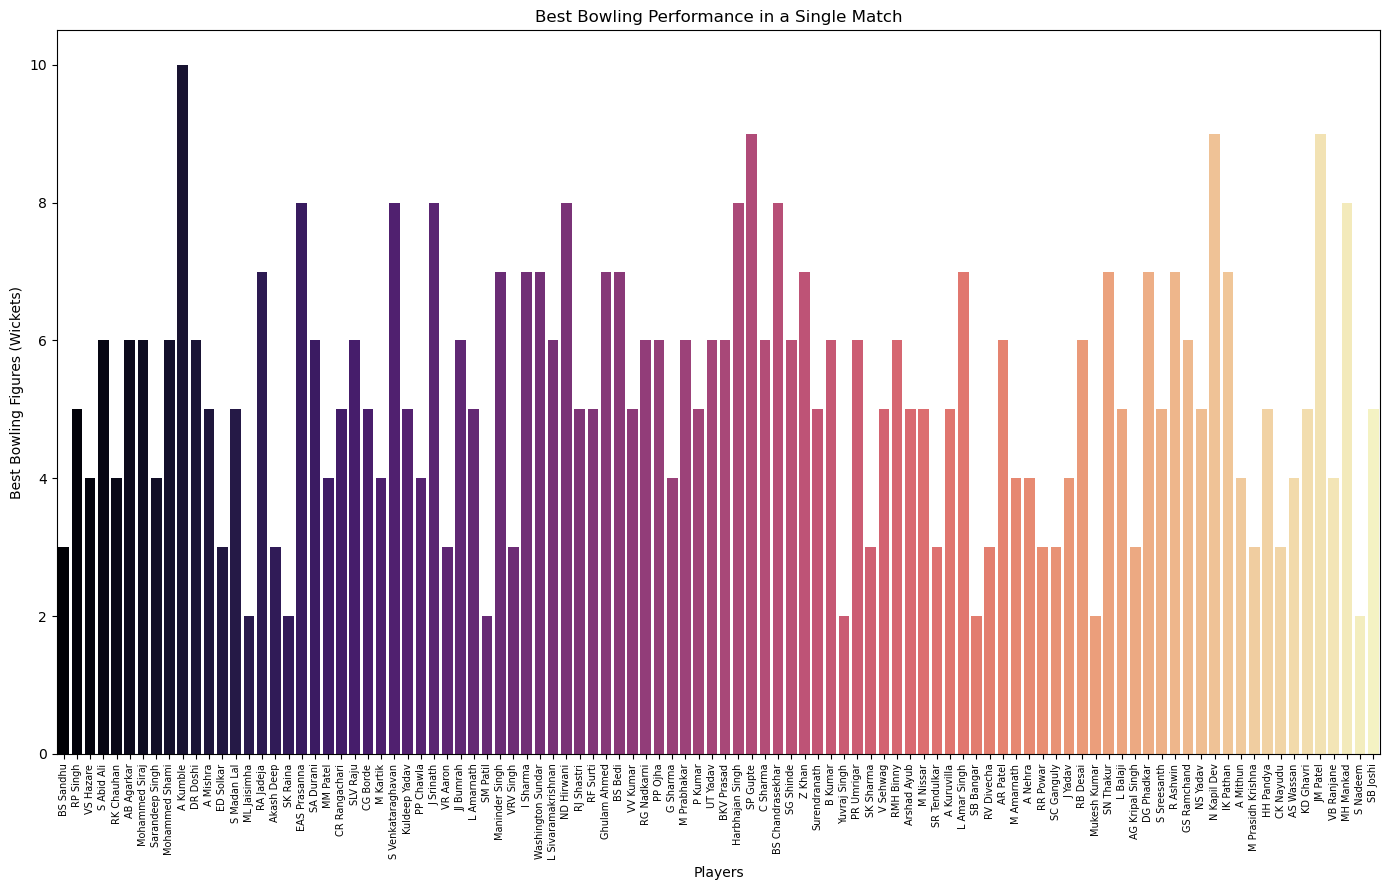

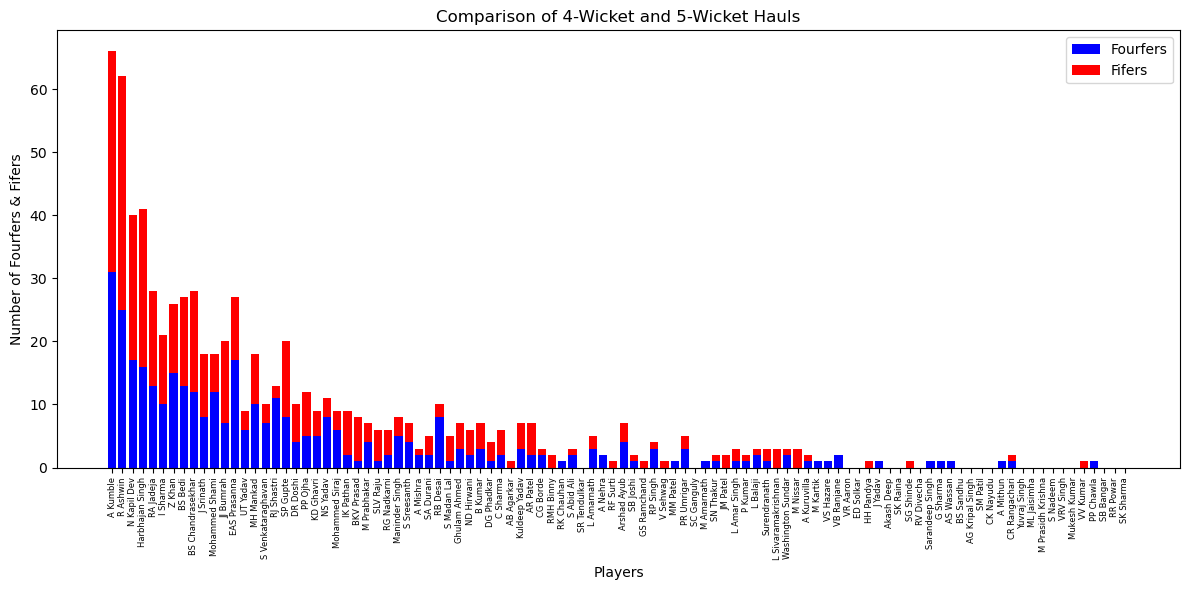

Type 'Batsmen' or 'Bowler' for their stats (or 'back' to return):  back


!!!  Press 1 for Test Matches...
!!!  Press 2 for ODI Matches...
!!!  Press 3 for T20 Matches...
!!!  Type 'quit' to Exit...


Give Your Choice ! :  quit



Thanks for using this Cricket Analytic System!


In [5]:
import time
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

def fetch_and_store_data_from_url(table_name, url, db_engine, rename_dict):
    try:
        tables = pd.read_html(url)
        df = tables[0]  
        
        # Rename columns
        df.rename(columns=rename_dict, inplace=True)
        
        # Store the data in the database
        df.to_sql(table_name, con=db_engine, if_exists='replace', index=False)
        print(f"Data successfully stored in the database for {table_name}.")
        
    except Exception as e:
        print(e, "\nFailed to fetch or store data from URL.")

def fetch_and_store_data(table_name, url, db_engine, rename_dict):
    try:
        
        query = f"SELECT * FROM {table_name} LIMIT 1"
        df = pd.read_sql(query, db_engine)
        
        if df.empty:
            print(f"No existing data found for {table_name}. Fetching from URL...")
            fetch_and_store_data_from_url(table_name, url, db_engine, rename_dict)
        
        df = pd.read_sql(f"SELECT * FROM {table_name}", db_engine)
        return df
    
    except Exception:
        print(f"Fetching fresh data from URL for {table_name}...")
        fetch_and_store_data_from_url(table_name, url, db_engine, rename_dict)
        return pd.read_sql(f"SELECT * FROM {table_name}", db_engine)

def plot_runs_vs_strike_rate(df):
    if {'Runs', 'SR', 'Player'}.issubset(df.columns):
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Runs'], df['SR'], color='red', alpha=0.7)
        plt.xlabel("Total Runs")
        plt.ylabel("Strike Rate")
        plt.title("Runs vs Strike Rate")
        plt.grid(True)
        plt.show()

def plot_runs_vs_average(df):
    if {'Runs', 'Ave', 'Matches', 'Player'}.issubset(df.columns):
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Runs'], df['Ave'], s=df['Matches']*5, alpha=0.6, color='blue', edgecolors='black')
        plt.xlabel("Total Runs")
        plt.ylabel("Batting Average")
        plt.title("Runs vs Batting Average (Bubble Size = Matches)")
        plt.grid(True)
        plt.show()
        
def plot_hundreds_vs_fifties(df):
    if {'Player', 'Hundreds', 'Fifties'}.issubset(df.columns):
        
        df['Hundreds'] = pd.to_numeric(df['Hundreds'], errors='coerce').fillna(0)
        df['Fifties'] = pd.to_numeric(df['Fifties'], errors='coerce').fillna(0)

        plt.figure(figsize=(12, 6))
        plt.bar(df['Player'], df['Hundreds'], color='green', label='Hundreds')
        plt.bar(df['Player'], df['Fifties'], bottom=df['Hundreds'], color='blue', label='Fifties')
        plt.xlabel("Players")
        plt.ylabel("Centuries & Half-centuries")
        plt.title("Hundreds vs. Fifties Comparison")
        plt.xticks(rotation=90, fontsize=6)
        plt.legend()
        plt.tight_layout()
        plt.show()

def plot_boundary_percentage(df):
    df.replace({r"\+": ""}, regex=True, inplace=True)

    if {'Player', 'Runs', 'Fours', 'Sixes'}.issubset(df.columns):
        
        df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')  
        df['Fours'] = pd.to_numeric(df['Fours'], errors='coerce')
        df['Sixes'] = pd.to_numeric(df['Sixes'], errors='coerce')

        # Fill NaN values with 0 to prevent errors
        df.fillna(0, inplace=True)

        # Calculate boundary runs and percentage
        df['Boundary_Runs'] = df['Fours'] * 4 + df['Sixes'] * 6
        df['Boundary_Percentage'] = (df['Boundary_Runs'] / df['Runs']) * 100

        
        plt.figure(figsize=(15, 6))
        sns.barplot(x='Player', y='Boundary_Percentage', data=df, palette='coolwarm')
        plt.xlabel("Players")
        plt.ylabel("Boundary % of Total Runs")
        plt.title("Percentage of Runs Scored via Boundaries")
        plt.xticks(rotation=90, fontsize=8)
        plt.tight_layout()
        plt.show()

def plot_boxplot_matches_vs_runs(df):
    """Creates a boxplot for Matches vs Runs"""
    if {'Matches', 'Runs'}.issubset(df.columns):
        df['Matches'] = pd.to_numeric(df['Matches'], errors='coerce')
        df['Runs'] = pd.to_numeric(df['Runs'], errors='coerce')

        plt.figure(figsize=(15, 6))
        sns.boxplot(x=df['Matches'], y=df['Runs'], palette='viridis')

        plt.xlabel("Matches Played")
        plt.ylabel("Runs Scored")
        plt.title("Boxplot of Runs vs Matches")
        plt.xticks(rotation=90, fontsize=8)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
    else:
        print("Required columns 'Matches' and 'Runs' are missing from the DataFrame.")

def plot_batting_heatmap(df):
    """Creates a heatmap of correlations between batting stats"""
    if {'Runs', 'Matches', 'Innings', 'SR', 'Ave', 'Hundreds', 'Fifties', 'Ducks'}.issubset(df.columns):
        numeric_df = df[['Runs', 'Matches', 'Innings', 'SR', 'Ave', 'Hundreds', 'Fifties', 'Ducks']].apply(pd.to_numeric, errors='coerce')
        plt.figure(figsize=(8, 6))
        sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Heatmap of Batting Stats Correlation")
        plt.show()

def plot_ducks_trend(df):
    """Creates a line plot for Ducks"""
    if {'Player', 'Ducks'}.issubset(df.columns):
        df['Ducks'] = pd.to_numeric(df['Ducks'], errors='coerce').fillna(0)
        
        plt.figure(figsize=(15, 6))
        plt.plot(df['Player'], df['Ducks'], color='blue', label="Ducks")

        plt.xlabel("Players")
        plt.ylabel("Number of Ducks")
        plt.title("Ducks Trend Across Players")
        plt.xticks(rotation=90, fontsize=8)
        plt.margins(x=0.01)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

def handle_batsmen_choice(format_type, db_engine):
    url_mapping = {
        'test': 'https://www.espncricinfo.com/records/team/batting-most-runs-career/india-6/test-matches-1',
        'odi': 'https://www.espncricinfo.com/records/team/batting-most-runs-career/india-6/one-day-internationals-2',
        't20': 'https://www.espncricinfo.com/records/team/batting-most-runs-career/india-6/twenty20-internationals-3'
    }
    table_name = f"{format_type}_batters"
    rename_dict = {'Mat': 'Matches', 'Inns': 'Innings', '4s': 'Fours', '6s': 'Sixes', '100': 'Hundreds', '50': 'Fifties', '0': 'Ducks'}
    
    df = fetch_and_store_data(table_name, url_mapping[format_type], db_engine, rename_dict)
    if df is not None:
        plot_runs_vs_strike_rate(df)
        plot_runs_vs_average(df)
        plot_hundreds_vs_fifties(df)
        plot_boundary_percentage(df)
        plot_boxplot_matches_vs_runs(df) 
        plot_batting_heatmap(df)           
        plot_ducks_trend(df) 


# Bowlers Graphs
def plot_best_bowling_figures(df):
    if {'Player', 'BBI'}.issubset(df.columns):
        
        df[['BBI_Wickets', 'BBI_RunsConceded']] = df['BBI'].str.split('/', expand=True)
        df['BBI_Wickets'] = pd.to_numeric(df['BBI_Wickets'], errors='coerce')
        df['BBI_RunsConceded'] = pd.to_numeric(df['BBI_RunsConceded'], errors='coerce')

        
        df_shuffled = df.sample(frac=1, random_state=42) 

        plt.figure(figsize=(14, 9))
        sns.barplot(x='Player', y='BBI_Wickets', data=df_shuffled, palette='magma')  # Use shuffled data
        plt.xlabel("Players")
        plt.ylabel("Best Bowling Figures (Wickets)")
        plt.title("Best Bowling Performance in a Single Match")
        plt.xticks(rotation=90, fontsize=7)
        plt.tight_layout()
        plt.show()

def plot_fourfers_vs_fifers(df):
    if {'Player', 'Fourfer', 'Fifer'}.issubset(df.columns):
        df['Fourfer'] = pd.to_numeric(df['Fourfer'], errors='coerce').fillna(0)
        df['Fifer'] = pd.to_numeric(df['Fifer'], errors='coerce').fillna(0)

        plt.figure(figsize=(12, 6))
        plt.bar(df['Player'], df['Fourfer'], color='blue', label='Fourfers')
        plt.bar(df['Player'], df['Fifer'], bottom=df['Fourfer'], color='red', label='Fifers')
        plt.xlabel("Players")
        plt.ylabel("Number of Fourfers & Fifers")
        plt.title("Comparison of 4-Wicket and 5-Wicket Hauls")
        plt.xticks(rotation=90, fontsize=6)
        plt.legend()
        plt.tight_layout()
        plt.show()

def plot_economy_vs_strike_rate(df):
    if {'Econ', 'SR', 'Player'}.issubset(df.columns):
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Econ'], df['SR'], color='orange', alpha=0.7)
        plt.xlabel("Economy Rate")
        plt.ylabel("Strike Rate")
        plt.title("Economy Rate vs Strike Rate")
        plt.grid(True)
        plt.show()

def plot_wickets_vs_bowling_average(df):
    if {'Wickets', 'Ave', 'Matches', 'Player'}.issubset(df.columns):
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Wickets'], df['Ave'], s=df['Matches']*5, alpha=0.6, color='purple', edgecolors='black')
        plt.xlabel("Total Wickets")
        plt.ylabel("Bowling Average")
        plt.title("Wickets vs Bowling Average")
        plt.grid(True)
        plt.show()

def plot_boxplot_matches_vs_wickets(df):
    """Creates a boxplot for Matches vs Wickets"""
    df['Matches'] = pd.to_numeric(df['Matches'], errors='coerce')
    df['Wickets'] = pd.to_numeric(df['Wickets'], errors='coerce')

    plt.figure(figsize=(15, 6))
    sns.boxplot(y=df['Matches'], x=df['Wickets'], palette='viridis')
    
    plt.xlabel("Wickets Taken")
    plt.ylabel("Matches Played")
    plt.title("Boxplot of Wickets vs Matches")
    plt.ylim(df['Wickets'].quantile(0.05), df['Wickets'].quantile(0.95))  # Removing extreme outliers
    plt.xticks(rotation=90, fontsize=8)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


def plot_bargraph_inns_vs_wickets(df):
    """Creates a bar graph for Innings vs Wickets"""
    df['Inns'] = pd.to_numeric(df['Innings'], errors='coerce')
    df['Wickets'] = pd.to_numeric(df['Wickets'], errors='coerce')

    plt.figure(figsize=(15, 6))
    sns.barplot(x=df['Innings'], y=df['Wickets'], palette='coolwarm',linestyle='--')

    plt.xlabel("Innings Played")
    plt.ylabel("Wickets Taken")
    plt.title("Wickets vs Innings")
    plt.xticks(rotation=90, ha="right", fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def plot_bowling_heatmap(df):
    if {'Wickets', 'Matches', 'Econ', 'SR', 'Fourfer', 'Fifer'}.issubset(df.columns):
        numeric_df = df[['Wickets', 'Matches', 'Econ', 'SR', 'Fourfer', 'Fifer']].apply(pd.to_numeric, errors='coerce')
        plt.figure(figsize=(8, 6))
        sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
        plt.title("Heatmap of Bowling Stats Correlation")
        plt.show()

def handle_bowler_choice(format_type, db_engine):
    url_mapping = {
        'test': 'https://www.espncricinfo.com/records/team/bowling-most-wickets-career/india-6/test-matches-1',
        'odi': 'https://www.espncricinfo.com/records/team/bowling-most-wickets-career/india-6/one-day-internationals-2',
        't20': 'https://www.espncricinfo.com/records/team/bowling-most-wickets-career/india-6/twenty20-internationals-3'
    }
    table_name = f"{format_type}_bowlers"
    rename_dict = {'Mat': 'Matches', 'Inns': 'Innings', 'Wkts': 'Wickets', '4': 'Fourfer', '5': 'Fifer'}
    
    df = fetch_and_store_data(table_name, url_mapping[format_type], db_engine, rename_dict)
    if df is not None:
       plot_bargraph_inns_vs_wickets(df)#barplot
       plot_bowling_heatmap(df)#heatmap
       plot_boxplot_matches_vs_wickets(df)#boxplot
       plot_wickets_vs_bowling_average(df)#scatter plot
       plot_economy_vs_strike_rate(df)#scatter plot
       plot_best_bowling_figures(df)#barplot
       plot_fourfers_vs_fifers(df)#bar graph

def main():
    print("  Welcome to this Cricket Visual Analytic System ... !")
    time.sleep(1)
    print("\n! Analyzing Indian Cricketers' Stats with Visual Analytics !\n")
    time.sleep(2)
    
    db_engine = create_engine('mysql+pymysql://root:@localhost:3306/cricket')
    
    while True:
        print("!!!  Press 1 for Test Matches...")
        print("!!!  Press 2 for ODI Matches...")
        print("!!!  Press 3 for T20 Matches...")
        print("!!!  Type 'quit' to Exit...")
        choice = input("Give Your Choice ! : ")
        
        format_types = {'1': 'test', '2': 'odi', '3': 't20'}
        if choice in format_types:
            format_type = format_types[choice]
            while True:
                role = input("Type 'Batsmen' or 'Bowler' for their stats (or 'back' to return): ").lower()
                if role == 'batsmen':
                    handle_batsmen_choice(format_type, db_engine)
                elif role == 'bowler':
                    handle_bowler_choice(format_type, db_engine)
                elif role == 'back':
                    break
                else:
                    print("Invalid input! Try again.")
        
        elif choice.lower() == 'quit':
            print("\nThanks for using this Cricket Analytic System!")
            break
        else:
            print("Invalid Input! Please Try Again!")

if __name__ == "__main__":
    main()
